In [1]:
# Use conda env "human_pose" for kernel
from pathlib import Path
import cv2
import numpy as np


%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
gt_nomask_path = "/media/kz/Extreme-SSD/Research/NeuS2-data/ego4d/synthetic/dataset-cup-30/train/0011.png"
rendered_nomask_path = "/home/kz/Desktop/Research/NeuS2-kz/NeuS2/output/red_cup_1000_nomask_blackbg/images/step_500_10_pred.png"
rendered_masked_path = "/home/kz/Desktop/Research/NeuS2-kz/NeuS2/output/red_cup_1000_masked/images/step_500_10_pred.png"

# Load Original Image

(1080, 1920, 3)


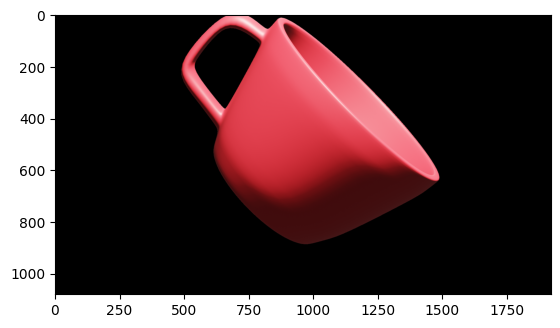

In [3]:
gt_nomask = cv2.imread(gt_nomask_path)
print(gt_nomask.shape)
gt_nomask_RGB = cv2.cvtColor(gt_nomask, cv2.COLOR_BGR2RGB)
plt.imshow(gt_nomask_RGB)
plt.show()

(1080, 1920, 3)


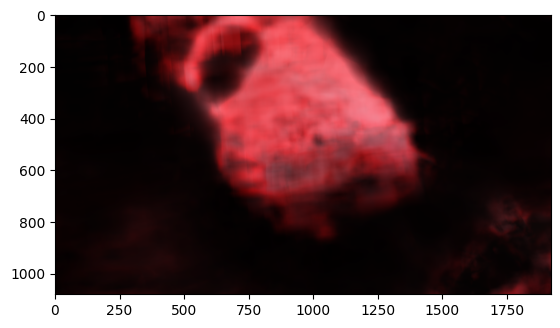

In [4]:
rendered_nomask = cv2.imread(rendered_nomask_path)
print(rendered_nomask.shape)
rendered_nomask_RGB = cv2.cvtColor(rendered_nomask, cv2.COLOR_BGR2RGB)
plt.imshow(rendered_nomask_RGB)
plt.show()

(1080, 1920, 3)


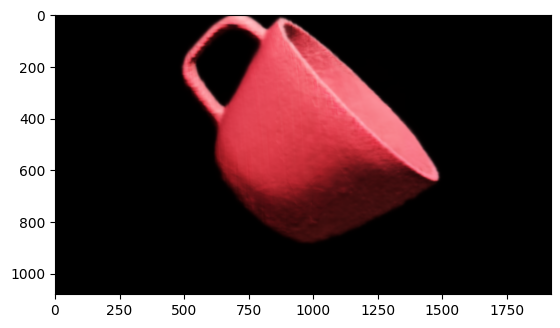

In [5]:
rendered_masked = cv2.imread(rendered_masked_path)
print(rendered_masked.shape)
rendered_masked_RGB = cv2.cvtColor(rendered_masked, cv2.COLOR_BGR2RGB)
plt.imshow(rendered_masked_RGB)
plt.show()

Text(0.5, 0.98, 'Original image (camera 011)')

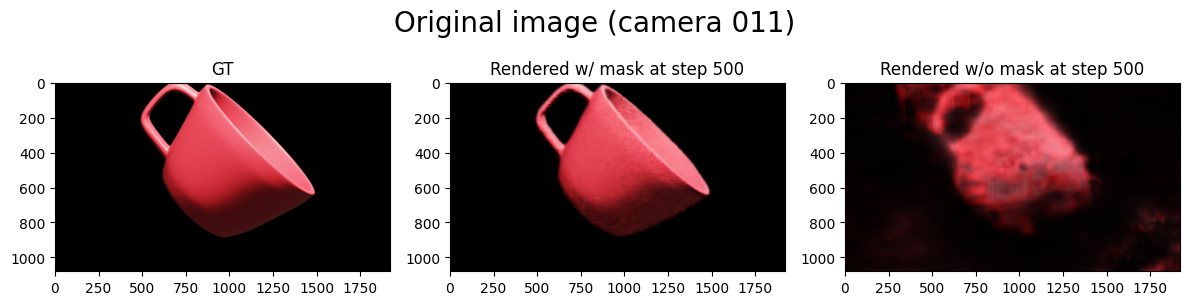

In [6]:
fig = plt.figure(figsize=(12, 3.5))

plt.subplot(1, 3, 1)
plt.imshow(gt_nomask_RGB)
plt.title("GT")

plt.subplot(1, 3, 2)
plt.imshow(rendered_masked_RGB)
plt.title("Rendered w/ mask at step 500")

plt.subplot(1, 3, 3)
plt.imshow(rendered_nomask_RGB)
plt.title("Rendered w/o mask at step 500")

plt.tight_layout()
plt.suptitle('Original image (camera 011)', fontsize=20)

# Visualization of SAM layers

## Image Embedding

Visualization of image embedding: the output of the image encoder. ViT features.

The SAM model first converts the image into an image embedding that allows high quality masks to be efficiently produced from a prompt. 

* the `SamPredictor` class. 
* the `set_image` method

In [7]:
from segment_anything import sam_model_registry, SamPredictor

Load the SAM model and predictor. Using `vit_h` model.

In [8]:
sam_checkpoint = "/home/kz/Desktop/Research/SAM/model/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

Process the image to produce an image embedding by calling `SamPredictor.set_image()`.

In [9]:
predictor.set_image(gt_nomask_RGB)

In [10]:
gt_image_embedding = predictor.features

In [11]:
print(gt_image_embedding.shape)

torch.Size([1, 256, 64, 64])


In [12]:
gt_image_embedding_cpu = gt_image_embedding.squeeze().cpu().numpy()

In [13]:
print(gt_image_embedding_cpu.shape)

(256, 64, 64)


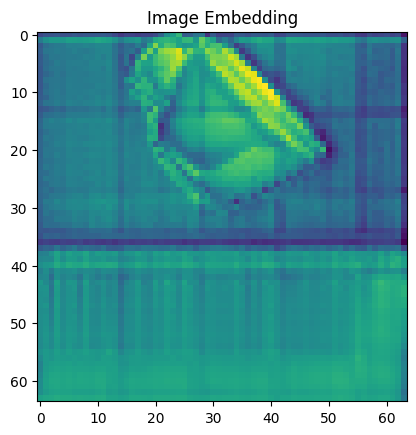

In [14]:
# Visualize the tensor as a 64x64 image
plt.imshow(gt_image_embedding_cpu[44], cmap='viridis')  # Adjust the cmap as needed
plt.title('Image Embedding')
plt.show()

In [15]:
predictor.set_image(rendered_nomask_RGB)
rendered_nomask_image_embedding = predictor.features
rendered_nomask_image_embedding_cpu = rendered_nomask_image_embedding.squeeze().cpu().numpy()

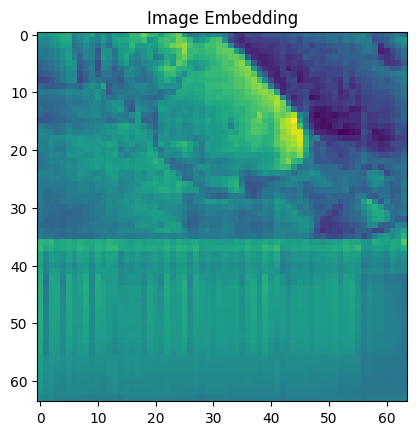

In [16]:
plt.imshow(rendered_nomask_image_embedding_cpu[0], cmap='viridis')  # Adjust the cmap as needed
plt.title('Image Embedding')
plt.show()

In [17]:
predictor.set_image(rendered_masked_RGB)
rendered_masked_image_embedding = predictor.features
rendered_masked_image_embedding_cpu = rendered_masked_image_embedding.squeeze().cpu().numpy()

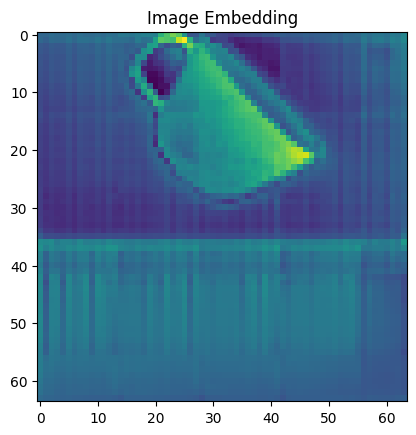

In [18]:
plt.imshow(rendered_masked_image_embedding_cpu[0], cmap='viridis')  # Adjust the cmap as needed
plt.title('Image Embedding')
plt.show()

Text(0.5, 0.98, 'Image Embedding (camera 011)\n(sam_vit_h_4b8939.pth)')

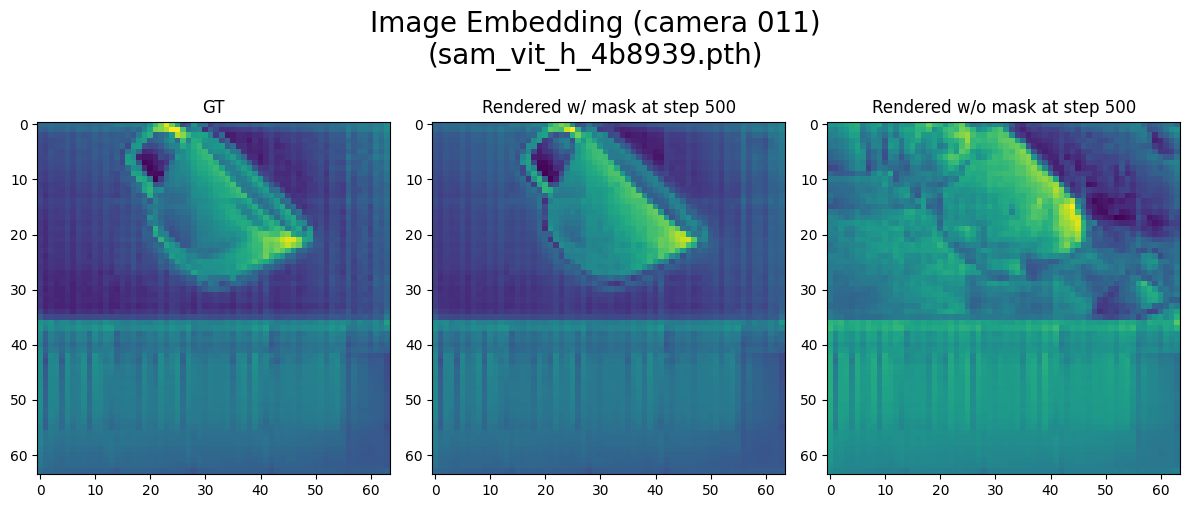

In [19]:
fig = plt.figure(figsize=(12, 6))

dimension_to_visualize = 0

plt.subplot(1, 3, 1)
plt.imshow(gt_image_embedding_cpu[dimension_to_visualize], cmap='viridis')
plt.title("GT")

plt.subplot(1, 3, 2)
plt.imshow(rendered_masked_image_embedding_cpu[dimension_to_visualize], cmap='viridis')
plt.title("Rendered w/ mask at step 500")

plt.subplot(1, 3, 3)
plt.imshow(rendered_nomask_image_embedding_cpu[dimension_to_visualize], cmap='viridis')
plt.title("Rendered w/o mask at step 500")

plt.tight_layout()
plt.suptitle('Image Embedding (camera 011)\n(sam_vit_h_4b8939.pth)', fontsize=20)